# LAB | A/B Testing in Python

### Challenge 1: 🚀 *Comparing Two Website Versions Using Hypothesis Testing*  

### **Objective**: 
Perform an A/B test to determine if a new webpage design (`Version B`) leads to a higher **click-through rate (CTR)** than the original (`Version A`).  

#### 📌 **Project Overview**  
We’ll:  
1. **Simulate** A/B test data (users & clicks).  
2. **Analyze** the results using statistical tests.  
3. **Conclude** whether `Version B` performs better.  



### **Problem Statement**  
You are a data analyst at an e-commerce company. The team wants to test if a new webpage design (`Version B`) increases click-through rates (CTR) compared to the original (`Version A`).  

### **Tasks**  
1. **Simulate Data**:  
   - Generate synthetic data for `Version A` (1000 visitors, 150 clicks) and `Version B` (1050 visitors, 180 clicks).  
2. **Statistical Test**:  
   - Perform a **Statistical Test** to compare CTRs.  
3. **Interpretation**:  
   - Determine if the difference is statistically significant (use α = 0.05).  
4. **Visualization**:  
   - Plot the CTRs for both versions using appropriate chart.  

**Deliverables**:  
- Code for simulation, testing, and visualization.  
- Written conclusion (1–2 sentences) on whether `Version B` performs better.  

#### 🛠 **Setup & Data Generation**  
First, let’s create synthetic data for the experiment.  


In [1]:
### Import Libraries
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

> Simulate User Data, We’ll assume:

- Version A: 1000 visitors, 150 clicks.

- Version B: 1050 visitors, 180 clicks.

In [3]:
# Simulate data
np.random.seed(42)
visitors_a = 1000
clicks_a = 150
visitors_b = 1050
clicks_b = 180

In [4]:
data_clicks_a = [True if x < clicks_a else False for x in range(visitors_a)]
np.random.shuffle(data_clicks_a)
data_clicks_b = [True if x < clicks_b else False for x in range(visitors_b)]
np.random.shuffle(data_clicks_b)

df = pd.DataFrame({
        "version": ["A"] * visitors_a + ["B"] * visitors_b,
        "click": data_clicks_a + data_clicks_b
    })

In [5]:
df

,version,click
0,A,False
1,A,False
2,A,False
3,A,False
4,A,False
...,...,...
2045,B,False
2046,B,False
2047,B,True
2048,B,False


📊 Perform A/B Test
We’ll use a Chi-Square Test to compare proportions.

- Hypotheses

In [6]:
# Null Hypothesis (H₀): There is not a statistically significant difference between CRT_A and CRT_B
# Alternative Hypothesis: There is a statistically significant difference between CRT_A and CRT_B


- Run the Test

In [7]:
crosstab_result = pd.crosstab(df["version"], df["click"])

crosstab_result

click,False,True
version,,
A,850,150
B,870,180


In [8]:
chi2_statistic, chi2_p_value, _, _ = stats.chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(1.5863116736299872, 0.20785388523374118)

> Interpret Results

In [9]:
print(f"P-value: {chi2_p_value}")
if chi2_p_value < 0.05:
    print("There is enough evidence to reject the null hypothesis. There is a statistically significant difference between the CTR in Version A and Version B.")
else:
    print("There is not enough evidence to reject the null hypothesis. There is not a statistically significant difference between the CTR in Version A and Version B.")

P-value: 0.20785388523374118
There is not enough evidence to reject the null hypothesis. There is not a statistically significant difference between the CTR in Version A and Version B.


📈 Visualization

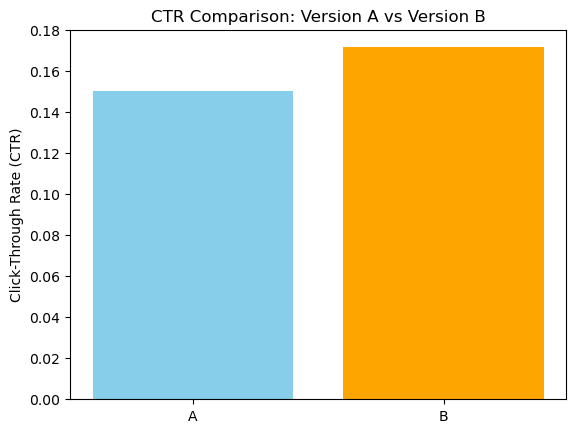

In [10]:
versions = df["version"].unique()

ctr_a = df[df["version"] == "A"]["click"].mean()
ctr_b = df[df["version"] == "B"]["click"].mean()
ctrs = [ctr_a, ctr_b]

plt.bar(versions, ctrs, color=["skyblue", "orange"])
plt.ylabel("Click-Through Rate (CTR)")
plt.title("CTR Comparison: Version A vs Version B")
plt.show()

## Challenge 2: 🚀 A/B Testing Challenge with Real Data

#### **Objective**:  
1. Analyze **real A/B test data** (from Kaggle) to compare conversion rates.  
2. Use **bootstrapping** to estimate confidence intervals.  

---

#### 📌 **Project Overview**  
We’ll:  
1. **Load real A/B test data** (user sessions and conversions).  
2. **Compare conversion rates** using statistical tests.  
3. **Apply bootstrapping** to validate results.  



### **Problem Statement**  
Use the [Kaggle Marketing A/B Test dataset](https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing) to analyze if a new marketing campaign (`Group B`) improves conversion rates over the old campaign (`Group A`).  

### **Tasks**  
1. **Data Preparation**:  
   - Load the dataset and explore key metrics (sample sizes, conversion rates).  
2. **Hypothesis Testing**:  
   - Perform a **Statistical Test** to compare conversions between groups.  
3. **Bootstrapping**:  
   - Implement bootstrapping (`n=1000` resamples) to estimate 95% confidence intervals for conversion rates.  
4. **Visualization**:  
   -Compare conversion rates for both groups.  

**Deliverables**:  
- Code for analysis and bootstrapping.  
- Answers:  
  - P-value and statistical conclusion.  
  - Confidence intervals for both groups.  

#### 🛠 **Setup & Data Loading**  


In [1]:
### Import Libraries
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest

> Load Open-Source Dataset
We’ll use the ["A/B Test Results"](https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing) dataset from Kaggle.

In [2]:
# Load data (ensure CSV is in your working directory)
data = pd.read_csv("./data/marketing_AB.csv")  # Download from Kaggle first!

In [3]:
data = data.drop(columns=["Unnamed: 0"])

In [4]:
data

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...
588096,1278437,ad,False,1,Tuesday,23
588097,1327975,ad,False,1,Tuesday,23
588098,1038442,ad,False,3,Tuesday,23
588099,1496395,ad,False,1,Tuesday,23


In [5]:
data["test group"].unique()

array(['ad', 'psa'], dtype=object)

In [6]:
# As per description on Kaggle: 
# If "ad" the person saw the advertisement, 
# if "psa" they only saw the public service announcement.

📊 Part 1: Traditional A/B Test
> Calculate Conversion Rates

In [7]:
# Count total ads and total conversions for ads and psa
ad_n = data[data["test group"]=="ad"]["total ads"].sum()
psa_n = data[data["test group"]=="psa"]["total ads"].sum()
ad_conv_n = data[data["test group"]=="ad"]["converted"].sum()
psa_conv_n = data[data["test group"]=="psa"]["converted"].sum()

In [23]:
cr_ad = ad_conv_n / ad_n
print(f"Ads Conversion Rate per ad: {cr_ad*100:.2f}%")

Ads Conversion Rate per ad: 0.10%


In [24]:
cr_psa = psa_conv_n / psa_n
print(f"PSA Conversion Rate per ad: {cr_psa*100:.2f}%")

PSA Conversion Rate per ad: 0.07%


In [25]:
print(f"Ads Conversion Rate per user: {data[data["test group"]=="ad"]["converted"].mean()*100:.2f}%")

Ads Conversion Rate per user: 2.55%


In [26]:
print(f"PSA Conversion Rate per user: {data[data["test group"]=="psa"]["converted"].mean()*100:.2f}%")

PSA Conversion Rate per user: 1.79%


> Statistical Test

In [10]:
# Compares conversion (converted True or False per user) between the two groups per user, 
# regardless of conversion rate per ad seen(!)

ad = data[data["test group"]=="ad"]["converted"]
psa = data[data["test group"]=="psa"]["converted"]

# Perform the t-test
t_stat, p_value = stats.ttest_ind(ad, psa)

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference between the two groups.")
else:
    print("There is no significant difference between the two groups.")

T-statistic: 7.37040597428566
P-value: 1.7033052627831264e-13
There is a significant difference between the two groups.


In [11]:
# Compares conversion rate per ad
counts = [ad_conv_n, psa_conv_n]
nobs = [ad_n, psa_n]

stat, p_value = proportions_ztest(counts, nobs)

print(f"Z-statistic: {stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference between the two groups.")
else:
    print("There is no significant difference between the two groups.")

Z-statistic: 7.228637767350958
P-value: 4.878627648760414e-13
There is a significant difference between the two groups.


#### EXTRA 📈 Part 2: Bootstrapping Challenge
**Why Bootstrapping?**
 - Bootstrapping helps estimate confidence intervals for conversion rates by resampling data.

> Bootstrap Function

In [29]:
# Conversion (converted True or False per user) between the two groups per user, 
# regardless of conversion rate per ad seen(!)
def bootstrap_per_user(data, resamples=1000):
    resample_means = []
    for _ in range(resamples):
        # Resample with replacement
        resample = np.random.choice(data, size=len(data), replace=True)
        avg = resample.mean()
        resample_means.append(avg)
    ci_lower = np.percentile(resample_means, 2.5)
    ci_upper = np.percentile(resample_means, 97.5)
    return ci_lower, ci_upper, resample_means

ad_lower_per_user, ad_upper_per_user, ad_resample_means_per_user = bootstrap_per_user(ad)
psa_lower_per_user, psa_upper_per_user, psa_resample_means_per_user = bootstrap_per_user(psa)
print(f"Confidence intervals per user for the Ads group: {ad_lower_per_user*100:.2f}%, {ad_upper_per_user*100:.2f}%")
print(f"Confidence intervals per user for the PSA group: {psa_lower_per_user*100:.2f}%, {psa_upper_per_user*100:.2f}%")

Confidence intervals per user for the Ads group: 2.51%, 2.60%
Confidence intervals per user for the PSA group: 1.62%, 1.96%


In [34]:
# Conversion Rate per ad
def bootstrap_per_ad(data, resamples=1000):
    resample_means = []
    for _ in range(resamples):
        # Resample with replacement
        resample = data.sample(n=len(data), replace=True)
        avg = resample["converted"].sum() / resample["total ads"].sum()
        resample_means.append(avg)
    ci_lower = np.percentile(resample_means, 2.5)
    ci_upper = np.percentile(resample_means, 97.5)
    return ci_lower, ci_upper, resample_means

ad_group = data[data["test group"]=="ad"]
psa_group = data[data["test group"]=="psa"]
ad_lower_per_ad, ad_upper_per_ad, ad_resample_means_per_ad = bootstrap_per_ad(ad_group)
psa_lower_per_ad, psa_upper_per_ad, psa_resample_means_per_ad = bootstrap_per_ad(psa_group)
print(f"Confidence intervals per user for the Ads group: {ad_lower_per_ad*100:.4f}%, {ad_upper_per_ad*100:.4f}%")
print(f"Confidence intervals per user for the PSA group: {psa_lower_per_ad*100:.4f}%, {psa_upper_per_ad*100:.4f}%")

Confidence intervals per user for the Ads group: 0.1013%, 0.1046%
Confidence intervals per user for the PSA group: 0.0655%, 0.0787%


>Visualize Results

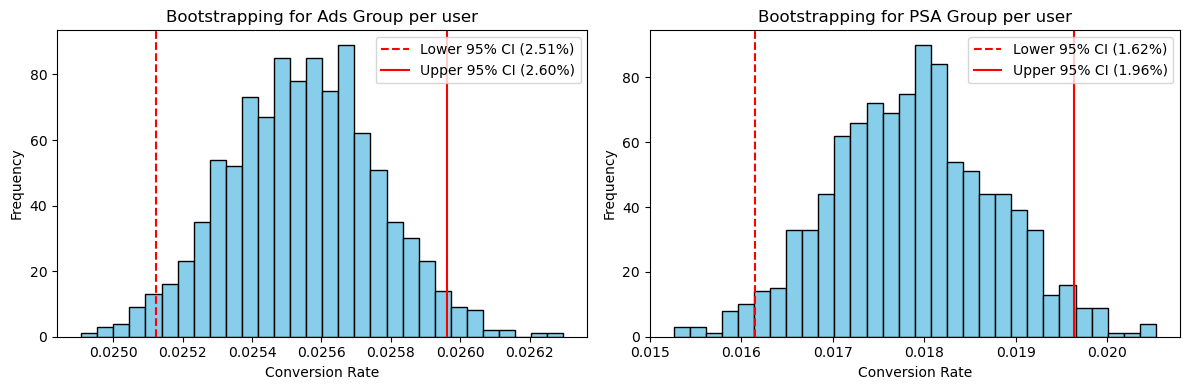

In [81]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(ad_resample_means_per_user, bins=30, color='skyblue', edgecolor='black')
plt.axvline(ad_lower_per_user, color='red', linestyle='--', label=f'Lower 95% CI ({ad_lower_per_user*100:.2f}%)')
plt.axvline(ad_upper_per_user, color='red', linestyle='-', label=f'Upper 95% CI ({ad_upper_per_user*100:.2f}%)')
plt.title('Bootstrapping for Ads Group per user')
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(psa_resample_means_per_user, bins=30, color='skyblue', edgecolor='black')
plt.axvline(psa_lower_per_user, color='red', linestyle='--', label=f'Lower 95% CI ({psa_lower_per_user*100:.2f}%)')
plt.axvline(psa_upper_per_user, color='red', linestyle='-', label=f'Upper 95% CI ({psa_upper_per_user*100:.2f}%)')
plt.title('Bootstrapping for PSA Group per user')
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

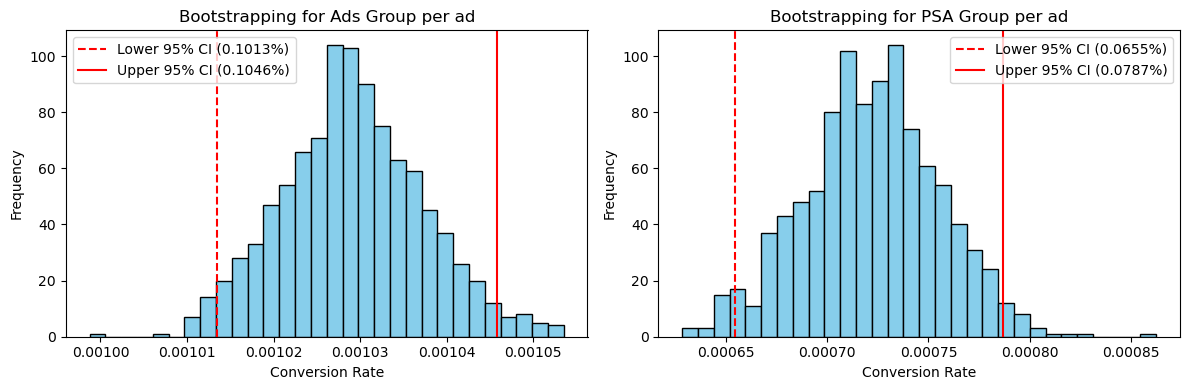

In [83]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(ad_resample_means_per_ad, bins=30, color='skyblue', edgecolor='black')
plt.axvline(ad_lower_per_ad, color='red', linestyle='--', label=f'Lower 95% CI ({ad_lower_per_ad*100:.4f}%)')
plt.axvline(ad_upper_per_ad, color='red', linestyle='-', label=f'Upper 95% CI ({ad_upper_per_ad*100:.4f}%)')
plt.title('Bootstrapping for Ads Group per ad')
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(psa_resample_means_per_ad, bins=30, color='skyblue', edgecolor='black')
plt.axvline(psa_lower_per_ad, color='red', linestyle='--', label=f'Lower 95% CI ({psa_lower_per_ad*100:.4f}%)')
plt.axvline(psa_upper_per_ad, color='red', linestyle='-', label=f'Upper 95% CI ({psa_upper_per_ad*100:.4f}%)')
plt.title('Bootstrapping for PSA Group per ad')
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

## (Bonus) Challenge 3: 🎮 Advanced A/B Testing Challenge: Cookie Cats Retention Analysis 

#### **Objective**:  
1. Analyze player **retention rates** in the `cookie_cats` mobile game A/B test.  
2. Implement **sequential testing** (to avoid peeking at results prematurely).  
3. Conduct **power analysis** to determine optimal sample size.  

### **Problem Statement**  
Analyze the [Cookie Cats dataset](https://www.kaggle.com/datasets/yufengsui/mobile-games-ab-testing) to determine if moving the game’s first gate from level 30 (`gate_30`) to level 40 (`gate_40`) affects player retention.  

### **Tasks**  
1. **Retention Analysis**:  
   - Compare **1-day retention rates** between `gate_30` and `gate_40` using a Z-test.  
2. **Sequential Testing**:  
   - Simulate checking results at intervals (every 500 users) to avoid "peeking bias."  
3. **Power Analysis**:  
   - Calculate the required sample size to detect a 2% difference in retention (α = 0.05, power = 0.8).  
4. **Optional**:  
   - Repeat analysis for **7-day retention**.  

**Deliverables**:  
- Code for retention comparison, sequential testing, and power analysis.  
- Written summary:  
  - Does `gate_40` significantly impact retention?  
  - How does sequential testing affect decision-making?  



### 🛠 **Setup & Data Loading**  


In [ ]:
# Import Libraries

In [ ]:
# Load dataset 
data = pd.read_csv("./data/cookie_cats.csv")  # Columns: userid, version, sum_gamerounds, retention_1, retention_7

📊 Part 1: Retention Rate Analysis
> Compare 1-Day Retention

In [ ]:
# TODO
# Insert your code HERE

> Statistical Test

In [ ]:
# TODO
# Insert your code HERE

📈 Part 2: Sequential Testing
>  Why Sequential Testing?

- Avoids "peeking" at results prematurely by checking at intervals.

In [ ]:
# TODO
# Insert your code HERE

⚡ Part 3: Power Analysis
>  Determine Required Sample Size

In [ ]:
# TODO
# Insert your code HERE

Enjoy & Happy A/B Testing :) ......!